<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_1_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

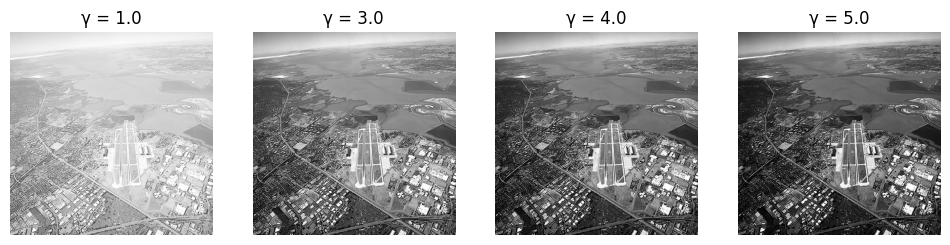

In [ ]:
import cv2  # 이미지 처리용 OpenCV 모듈
import numpy as np  # 배열 및 수치 계산을 위한 NumPy
import matplotlib.pyplot as plt  # 결과 시각화용 Matplotlib

# URL에서 이미지를 불러온 후 흑백으로 바꾸는 함수 정의
def get_gray_image_from_web(url):
    # 웹 주소에서 이미지 바이트 데이터를 가져온다
    with urllib.request.urlopen(url, timeout=10) as response:
        img_bytes = bytearray(response.read())        # 바이트로 변환
    # 바이트 배열을 OpenCV 이미지로 디코딩하고 흑백으로 불러오기
    image_np = np.asarray(img_bytes, dtype=np.uint8)
    grayscale_img = cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE)
    return grayscale_img.astype(np.float32)           # 계산을 위해 float32로 변환

# 감마 보정 함수 (밝기 조절용)
def gamma_change(img_input, gamma_val, multiply_factor=1.0):
    # 0~255 범위의 픽셀 값을 0~1 사이로 정규화함
    normalized_img = img_input / 255.0
    # 정규화된 값에 감마 함수 적용 (어둡거나 밝게 조정됨)
    corrected_img = multiply_factor * np.power(normalized_img, gamma_val)
    # 다시 원래 범위로 복구하고, 값이 넘치지 않도록 클리핑
    output_img = np.clip(corrected_img * 255.0, 0, 255)
    # 이미지로 저장하기 위해 uint8 형식으로 바꿔줌
    return output_img.astype(np.uint8)

# 이미지 주소 지정
img_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif'
original_img = get_gray_image_from_web(img_url)   # 함수 호출해서 흑백 이미지 불러오기

# 실험할 감마 값들 정의 (다양한 밝기 변화 확인)
gamma_list = [1.0, 3.0, 4.0, 5.0]

# 보정된 결과 이미지들을 저장할 리스트 만들기
result_images = []

# 감마 값을 바꾸면서 각각 결과 확인
for g in gamma_list:
    output = gamma_change(original_img, g)     # 감마 보정 함수 실행
    result_images.append(output)               # 리스트에 결과 이미지 저장

# 이미지 결과들을 보여주는 부분
plt.figure(figsize=(12, 4))                    # 출력 이미지 창 크기 설정
for idx, (img, g) in enumerate(zip(result_images, gamma_list)):
    axis = plt.subplot(1, len(gamma_list), idx + 1)   # 여러 개의 이미지를 가로로 배치
    axis.imshow(img, cmap='gray')                     # 흑백으로 보여주기
    axis.set_title(f'γ = {g:.1f}')                    # 각 이미지 위에 감마 값 표시
    axis.axis('off')                                  # 축은 숨기기

plt.show()                                            # 최종 결과 출력


### 결과 분석 ###
# Fig3.9(a) 영상에 감마 보정을 적용하여 이미지의 대비를 조절해봄.
# 감마 값이 클수록 밝은 영역이 어두워지고 전체적으로 더 진한 이미지가 됨.
#
# - γ = 1.0: 원본 이미지와 동일한 상태로, 전체적으로 밝고 흐릿하며 윤곽이 잘 보이지 않음.
# - γ = 3.0: 비교적 어두운 부분이 생기며, 명암 대비가 조금씩 생기기 시작해 일부 구조가 드러남.
# - γ = 4.0: 이미지 전체가 더 어두워지고, 멀리 있어 원래 흐리게 보이던 형태들이 더 뚜렷하게 나타남.
# - γ = 5.0: 가장 강한 보정이며 밝았던 배경은 거의 사라지고 구조적 패턴이 뚜렷하게 부각됨.
#
# 따라서, 감마 보정은 흐릿한 영상에서 특정 구조나 윤곽을 강조하는 데 유용하며 적절한 감마 값을 선택하면 분석이나 후속 처리에 도움이 될 수 있음.
